## Session #1 Homework

### Question 1

In [1]:
# What's the version of NumPy that you installed?
import numpy as np
np.__version__

'1.20.3'

### Question 2

In [2]:
# What's the version of Pandas?
import pandas as pd
pd.__version__

'1.3.2'

### Getting the data

In [3]:
data = pd.read_csv('car-price-data-ML ZoomCamp - Session 1.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Question 3

In [4]:
# What's the average price of BMW cars in the dataset?
grouped_data = data.groupby('Make')['MSRP'].agg(['mean'])
grouped_data.loc['BMW']

mean    61546.763473
Name: BMW, dtype: float64

### Question 4

In [5]:
# Select a subset of cars after year 2015 (inclusive, i.e. 2015 and after). How many of them have missing values for Engine HP?
Year_after_2015 = (data[data.Year >= 2015]) 
missing_HP_after_2015 = Year_after_2015['Engine HP'].isnull().sum()
missing_HP_after_2015

51

### Question 5

In [7]:
# Calculate the average "Engine HP" in the dataset.
mean_hp_before = data['Engine HP'].mean()
print(round(mean_hp_before))

# Use the fillna method and to fill the missing values in "Engine HP" with the mean value from the previous step.
data['Engine HP'].fillna(mean_hp_before, inplace=True)

# Now, calcualte the average of "Engine HP" again.
mean_hp_after = data['Engine HP'].mean()
print(round(mean_hp_after))

# Has it changed?
# No Change

249
249


### Question 6

In [8]:
# Select all the "Rolls-Royce" cars from the dataset.
rolls_royce_data = data[data['Make'] == 'Rolls-Royce']

# Select only columns "Engine HP", "Engine Cylinders", "highway MPG".
select_rr = rolls_royce_data[['Engine HP','Engine Cylinders','highway MPG']]

# Now drop all duplicated rows using drop_duplicates method (you should get a dataframe with 7 rows).
unduplicated_rr = select_rr.drop_duplicates()

# Get the underlying NumPy array. Let's call it X.
X = unduplicated_rr.values
X

array([[325.,   8.,  15.],
       [563.,  12.,  19.],
       [563.,  12.,  21.],
       [563.,  12.,  20.],
       [322.,  12.,  15.],
       [453.,  12.,  19.],
       [624.,  12.,  21.]])

In [9]:
# Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
XTX = (X.T).dot(X)
XTX

array([[1.754801e+06, 3.965600e+04, 6.519600e+04],
       [3.965600e+04, 9.280000e+02, 1.500000e+03],
       [6.519600e+04, 1.500000e+03, 2.454000e+03]])

In [10]:
# Invert XTX.
inverse_XTX = np.linalg.inv(XTX)
inverse_XTX

array([[ 5.17815728e-05,  9.06587044e-04, -1.92984188e-03],
       [ 9.06587044e-04,  1.05723058e-01, -8.87084092e-02],
       [-1.92984188e-03, -8.87084092e-02,  1.05900809e-01]])

In [11]:
# What's the sum of all the elements of the result?
total = np.sum(inverse_XTX)
print(f'Sum of all the elements is {total}')

Sum of all the elements is 0.032212320677486195


### Questions 7

In [12]:
# Create an array y with values [1000, 1100, 900, 1200, 1000, 850, 1300].
y = np.array([1000, 1100, 900, 1200, 1000, 850, 1300])
y

# Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
#print(inverse_XTX * (X.T))
m = inverse_XTX.dot(X.T)
w = m.dot(y)

# What's the value of the first element of w?.
w[0]

0.19989598183186175

## Session #2 Homework

###  Create a regression model for prediction apartment prices - 

#### (using New York City Airbnb Open Data)

Datset - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.__version__

'0.11.2'

#### EDA
Load the data.

In [73]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Look at the price variable. Does it have a long tail?

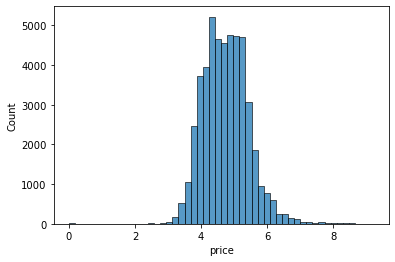

In [74]:
data.price.describe()

# Computing the log of price column values:
price_logs = np.log1p(data.price)

# plotting the logarithmic price column values:
sns.histplot(price_logs,bins=50)
plt.show()

Plotting the logarithmic values of price column shows that price variable has a long tail towards the right.

#### Features

In [75]:
# Select only specific columns from dataset for future use.
features = data[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']]

features.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1

Find a feature with missing values. How many missing values does it have?

In [76]:
features.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [77]:
features['minimum_nights'].describe()   # 50th percentile is the same as the median

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

#### Split the data

In [78]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n = len(data)

n_val = int(n * 0.2)   # split 20% into validation set
n_test = int(n * 0.2)  # split 20% into testing set
n_train = n - n_val - n_test  # remaining training set
n, n_val + n_test + n_train

(48895, 48895)

In [79]:
# getting the size of the splitted datasets:
n_val, n_test, n_train

(9779, 9779, 29337)

In [80]:
# Shuffle the initial dataset, use seed 42.
idx = np.arange(n)
np.random.seed(42)

np.random.shuffle(idx)  # shuffle the data from index
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [81]:
# getting the rows for each set from the shuffled indices:
df_val = data.iloc[idx[:n_val]]
df_test = data.iloc[idx[n_val:n_val+n_test]]
df_train = data.iloc[idx[n_val + n_test:]]

print(df_val.shape, df_test.shape,df_train.shape)

(9779, 16) (9779, 16) (29337, 16)


In [82]:
# Slicing out price column from the 3 split sets and assign to y variables for each:
# # Apply the log transformation to the price variable using the np.log1p() function.
y_train = np.log1p(df_train.price.values)   # getting numpy arrays instead of Pandas series for target variable
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [83]:
# Make sure that the target value ('price') is not in your dataframe.
# deleting the price column from Feature matrices of train, validation and test set:
del df_train['price']
del df_val['price']
del df_test['price']

print(df_val.shape, df_test.shape,df_train.shape)

(9779, 15) (9779, 15) (29337, 15)


### Question 3

#### Option 1 - Filling NaN with 0 - Training  a linear regression model without regularization -

In [84]:
subset_features = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']

In [85]:
# Creating a function to extract a subset of a df as an array - 
def prepare_X(df):
    
    df_num = df[subset_features]  # feature columns we want in our feature matrix subset
    df_num = df_num.fillna(0)  # fill missing values with zeros
    X = df_num.values   # extracting only values of subset as a Numpy array
    return X

In [86]:
# slicing only above feature columns to create a subset of training dataset:
X_train = prepare_X(df_train)

In [87]:
# Creating a function to predict car price's using 3 features - 
def train_linear_regression(X,y):
    # Step 1 - adding ones for bias term in features matrix - using np.ones() function:
    ones = np.ones(X.shape[0])
    # Step 2 - stacking the array for ones generated in Step 1 to the features' matrix:
    X = np.column_stack([ones, X])
    
    # Step 3 - compute the gram matrix by dot product of X matrix with X transpose:
    XTX = X.T.dot(X)
    # Step 4 - compute the inverse of XTX computes in Step 3 - using np.linalginv() function:
    XTX_inv = np.linalg.inv(XTX)
    
    # Step 5 - compute the weights of the entire car data using dot product multiplication with target variable y:
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # Step 6 - return the computed intercept or bias term and rest of factors of linear regression equation:
    return w_full[0], w_full[1:]

In [88]:
# Running the Linear regression model (function) for the training sets to get weights w0 and w:
w0, w = train_linear_regression(X_train, y_train)

# computing target variable y_pred -
# using weights w0 and w to compute the target variable y_pred:
y_pred = w0 + X_train.dot(w)
y_pred

array([4.87791291, 4.81288069, 5.55153718, ..., 5.02356152, 4.88478955,
       4.66641733])

In [89]:
# Creating a function to calculate the RMSE of actual target variable vs. predicted target variables:
def rmse(y,y_pred):
    # computing the squared error first:
    se = (y - y_pred) ** 2  
    # computing the mean of squared errors computed:
    mse = se.mean()
    # returning the square root of squared error:
    return np.sqrt(mse)

#### Option 2 - Filling NaN with Mean value - Training a linear regression model without regularization -

In [90]:
# Creating a function to extract a subset of a df as an array - 
def prepare_X2(df):
    df_num = df[subset_features]  # feature columns we want in our feature matrix subset
    df_num = df_num.fillna(df_train['reviews_per_month'].mean())  # fill missing values with mean of column
    X2 = df_num.values   # extracting only values of subset as a Numpy array
    return X2

In [91]:
# slicing only above feature columns to create a subset of training dataset:
X_train_2 = prepare_X2(df_train)

In [92]:
# Creating a function to predict car price's using 3 features - 
def train_linear_regression2(X,y):
    # Step 1 - adding ones for bias term in features matrix - using np.ones() function:
    ones = np.ones(X.shape[0])
    # Step 2 - stacking the array for ones generated in Step 1 to the features' matrix:
    X = np.column_stack([ones, X])
    
    # Step 3 - compute the gram matrix by dot product of X matrix with X transpose:
    XTX = X.T.dot(X)
    # Step 4 - compute the inverse of XTX computes in Step 3 - using np.linalginv() function:
    XTX_inv = np.linalg.inv(XTX)
    
    # Step 5 - compute the weights of the entire car data using dot product multiplication with target variable y:
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # Step 6 - return the computed intercept or bias term and rest of factors of linear regression equation:
    return w_full[0], w_full[1:]

In [93]:
# Running the Linear regression model (function) for the training sets to get weights w0 and w:
w0, w = train_linear_regression2(X_train_2, y_train)

# computing target variable y_pred -
# using weights w0 and w to compute the target variable y_pred:
y_pred = w0 + X_train_2.dot(w)
y_pred

array([4.86744762, 4.80488808, 5.54883838, ..., 5.01686784, 4.87418674,
       4.65564306])

In [94]:
# Creating a function to calculate the RMSE of actual target variable vs. predicted target variables:
def rmse2(y,y_pred):
    # computing the squared error first:
    se = (y - y_pred) ** 2  
    # computing the mean of squared errors computed:
    mse = se.mean()
    # returning the square root of squared error:
    return np.sqrt(mse)

#### Use the validation dataset to evaluate the models and compare the RMSE of each option.

Option 1 - Filling NaN with 0

In [95]:
# slicing subset feature array on to create a validation set:
X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)   # computing the predicted target variable y for validation set
val_score = rmse(y_val, y_pred)   # computing the rmse for validation set

Option 2 - Filling NaN with Mean value

In [96]:
# slicing subset feature array on to create a validation set:
X_val = prepare_X2(df_val)

y_pred = w0 + X_val.dot(w)   # computing the predicted target variable y for validation set
val_score2 = rmse2(y_val, y_pred)   # computing the rmse for validation set

Which option gives better RMSE?

In [97]:
# ound the RMSE scores to 2 decimal digits using round(score, 2)
print('Option 1 RMSE:',round(val_score,2))
print('Option 2 RMSE:',round(val_score2,2))

Option 1 RMSE: 0.64
Option 2 RMSE: 0.64


Both Options give almost same RMSE value on validation set.

### Question 4

Now let's train a regularized linear regression. 

For this question, fill the NAs with 0.

In [98]:
# Creating a Regularized function to predict price using features - 
def train_linear_regression_reg(X,y,r):
    # Step 1 - adding ones for bias term in features matrix - using np.ones() function:
    ones = np.ones(X.shape[0])
    # Step 2 - stacking the array for ones generated in Step 1 to the features' matrix:
    X = np.column_stack([ones, X])
    
    # Step 3 - compute the gram matrix by dot product of X matrix with X transpose:
    XTX = X.T.dot(X)
    # Step 4 - # add the alpha term r to diagonals of matrix use np.eye() function:
    XTX = XTX + r * np.eye(XTX.shape[0])   
    
    # Step 5 - compute the inverse of XTX computes in Step 3 - using np.linalginv() function:
    XTX_inv = np.linalg.inv(XTX)
    
    # Step 6 - compute the weights of the entire car data using dot product multiplication with target variable y:
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # Step 7 - return the computed intercept or bias term and rest of factors of linear regression equation:
    return w_full[0], w_full[1:]

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    
Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

In [99]:
# Using the newly created Regularized function:
# Finding the best regularization parameter, r for our Linear Regression model - 
# taking a series of r values to test our model and find the RMSE score for each:
for m in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    X_train = prepare_X(df_train)   # function replaces NaN with zeros
    wo, w = train_linear_regression_reg(X_train, y_train,r=m)   # training set
    
    X_val = prepare_X(df_val)    # validation set
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred)   # comparing actual vs prediction target variable in validation set
    print(m, round(w0,2), 'RMSE :',round(score,2))

0 -443.49 RMSE : 3.17
1e-06 -443.49 RMSE : 3.22
0.0001 -443.49 RMSE : 8.42
0.001 -443.49 RMSE : 50.86
0.01 -443.49 RMSE : 244.77
0.1 -443.49 RMSE : 410.02
1 -443.49 RMSE : 439.89
5 -443.49 RMSE : 442.76
10 -443.49 RMSE : 443.12


#### Which r gives the best RMSE?
r = 0.0001 gives a RMSE of 8.42 which is low but not extremely low.

### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

In [100]:
RMSE_scores = []

for a in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    n = len(data)

    # Shuffle the initial dataset, use different seed values from list:
    np.random.seed(a)
    
    idx = np.arange(n)
    np.random.shuffle(idx)# shuffle the data from index
    
    n_val = int(n * 0.2)   # split 20% into validation set
    n_test = int(n * 0.2)  # split 20% into testing set
    n_train = n - n_val - n_test  # remaining training set


    # getting the rows for each set from the shuffled indices:
    df_val = data.iloc[idx[:n_val]]
    df_test = data.iloc[idx[n_val:n_val+n_test]]
    df_train = data.iloc[idx[n_val + n_test:]]
   
    # Slicing out price column from the 3 split sets and assign to y variables for each:
    # # Apply the log transformation to the price variable using the np.log1p() function.
    y_train = np.log1p(df_train.price.values)   # getting numpy arrays instead of Pandas series for target variable
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    

    # Make sure that the target value ('price') is not in your dataframe.
    # deleting the price column from Feature matrices of train, validation and test set:
    del df_train['price']
    del df_val['price']
    del df_test['price']

    X_train = prepare_X(df_train)   # function replaces NaN with zeros
       
    # Training a model without regularization:
    wo, w = train_linear_regression(X_train, y_train)   # training set

    X_val = prepare_X(df_val) # validation set
    
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred)   # comparing actual vs prediction target variable in validation set
    
    print(a, idx, round(w0,2),'RMSE:',round(score,2))   
    RMSE_scores.append(score)

RMSE_std = np.std(RMSE_scores)

0 [43813 32734 25276 ... 42613 43567  2732] -443.49 RMSE: 23.14
1 [18907 46663 19757 ...  5192 12172 33003] -443.49 RMSE: 7.64
2 [22043 39679 45220 ...  6637 35343 23720] -443.49 RMSE: 19.56
3 [ 6920 38903 30764 ... 11513  1688  5994] -443.49 RMSE: 17.6
4 [25022 38145  2095 ... 27063  8366 17530] -443.49 RMSE: 19.35
5 [20531 20353 26436 ... 20463 18638 35683] -443.49 RMSE: 26.13
6 [27383  7800 18787 ... 42964 41187 31626] -443.49 RMSE: 22.89
7 [13636 25054 15227 ...   919 38467 10742] -443.49 RMSE: 20.78
8 [42099 22672  8754 ... 18417 25940  4547] -443.49 RMSE: 21.53
9 [25415  1329 31738 ... 22584   501 20828] -443.49 RMSE: 28.24


In [101]:
np.std(RMSE_scores)

5.302255023811292

In [102]:
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std:
RMSE_std

# Round the result to 3 decimal digits:
(round(RMSE_std, 3))

5.302

### Question 6

In [103]:
# Split the dataset like previously, use seed 9.
n = len(data)

# Shuffle the initial dataset, use different seed values from list:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)# shuffle the data from index
    
n_val = int(n * 0.2)   # split 20% into validation set
n_test = int(n * 0.2)  # split 20% into testing set
n_train = n - n_val - n_test  # remaining training set

# getting the rows for each set from the shuffled indices:
df_val = data.iloc[idx[:n_val]]
df_test = data.iloc[idx[n_val:n_val+n_test]]
df_train = data.iloc[idx[n_val + n_test:]]
   
# Slicing out price column from the 3 split sets and assign to y variables for each:
# # Apply the log transformation to the price variable using the np.log1p() function.
y_train = np.log1p(df_train.price.values)   # getting numpy arrays instead of Pandas series for target variable
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
    

# Make sure that the target value ('price') is not in your dataframe.
# deleting the price column from Feature matrices of train, validation and test set:
del df_train['price']
del df_val['price']
del df_test['price']

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

In [104]:
df_full_train = pd.concat([df_train,df_val])
# resetting index of combined training set:
df_full_train = df_full_train.reset_index(drop=True)

# Combining features matrix for training and validation set using full training set as input to the prepare_X  function:
X_full_train = prepare_X(df_full_train)
X_full_train 

# Combining y target variable array of training and validation set:
y_full_train = np.concatenate([y_train, y_val])
y_full_train


# Running the Regularized linear regression model and calculating the RMSE score on testing dataset:
w0, w = train_linear_regression_reg(X_full_train,y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

# What's the RMSE on the test dataset?
score

0.6404588269895755